### DunnHumby
* company wants to reward its loyal customers by giving them a heavy discount on the products they buy repeatedly.
* The objective of this project is to allocate the most relevant set of products to each customer by maximizing total relevancy.

### Constraints: 
* 1. Due to budget constraints, there is fixed volume of each product. For instance, product``565051`` cannot be allocated to more than **150** customers. For Referrence check [Product - Volume Dataset](#data_3).
* 2. There are some set of products which cannot be assigned together (e.g. product``5649565`` and ``564964`` cannot be given together to any customer). You can get this list in the [Products Exclusion Dataset](#data_2).
* 3. A customer can get **maximum 8** products and **minimum 3** products. **Drop** all the customers who qualify for less than      ``3 products``.
* 4. All the products allocated to a customer should be ``distinct`` (i.e. the same product cannot be allocated twice to the same customer)

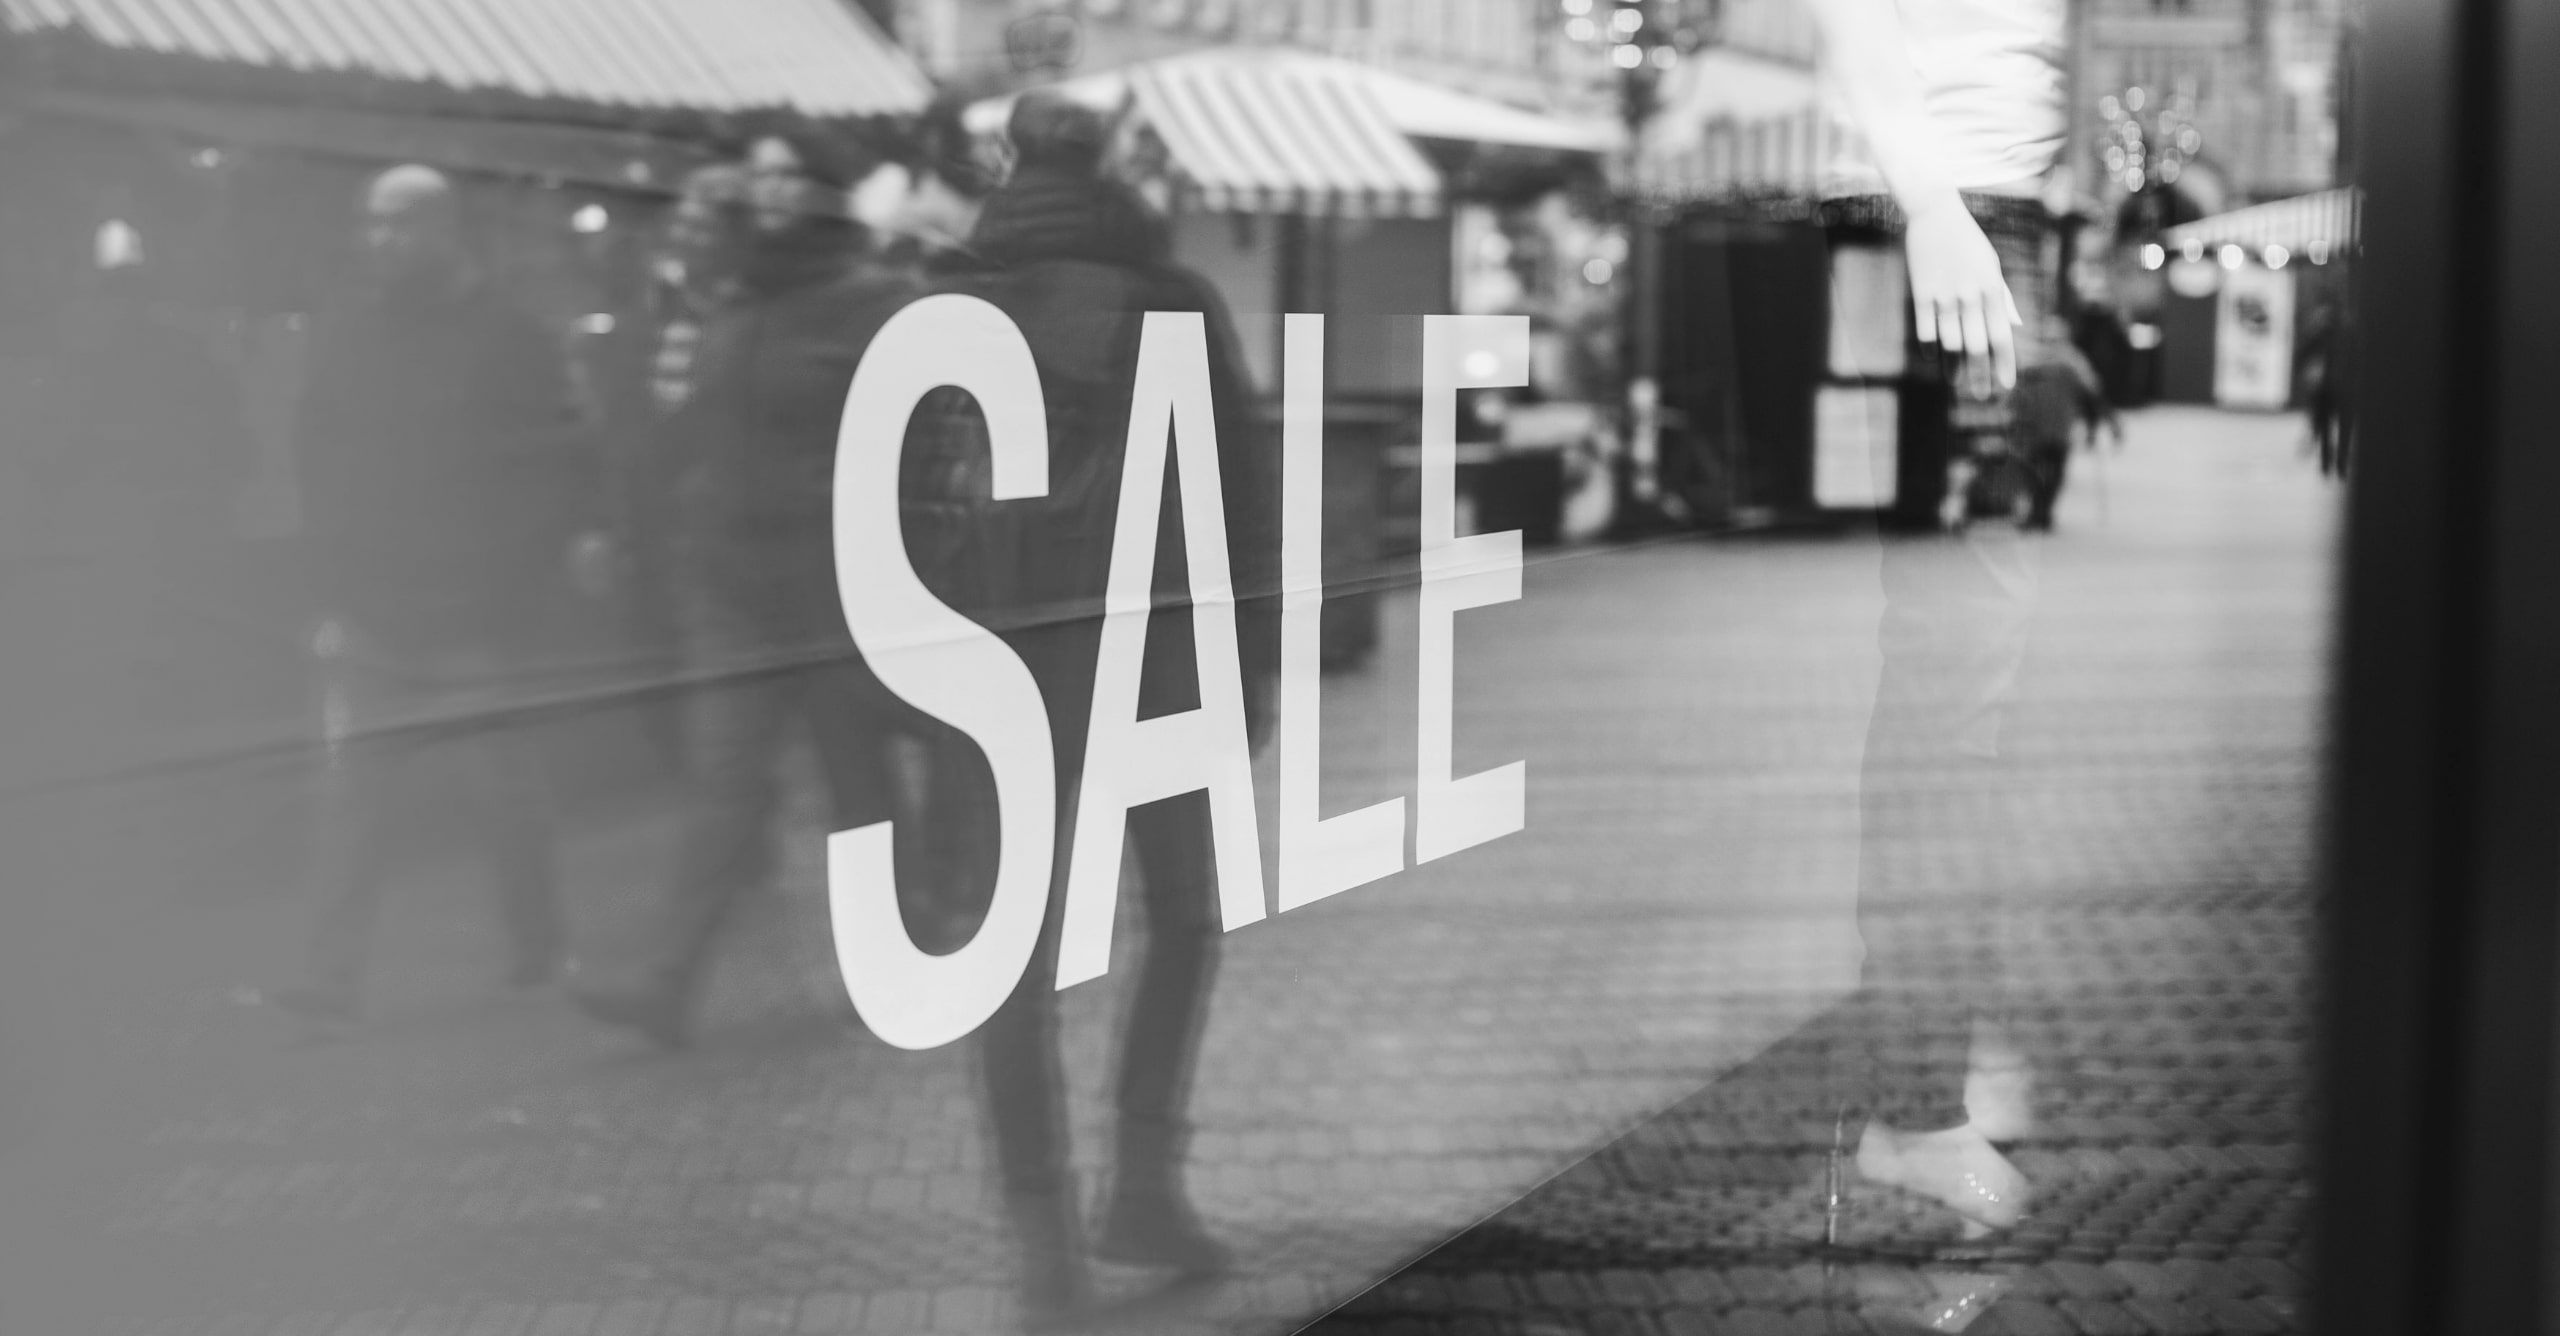

* Total **Relevancy Score =** `` 1088.9439968840002`` after analysing and performing all satisfied constraints

## Contents

1.	[Import Packages](#package)
2.	[Main Dataset](#data_1)
3.	[Products Exclusion Dataset](#data_2)
4.  [Product - Volume Dataset](#data_3)
5.  [Save Submission file](#save)
6.  [Load Saved File](#load_saved)


<a id="package"></a>
### 1) Import Packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

<a id="data_1"></a>
### 2) Main Dataset
* Here each relevancy_score defines how likely hood that the customer is buying this product

In [4]:
df_1 = pd.read_csv('datasets/Relevency_table.csv')
df_1.head(15) 

,customers,product,relevancy_score
0,A10001,5649565,0.293978
1,A10001,5649585,0.076184
2,A10001,5649607,0.312285
3,A10001,5649625,0.113652
4,A10001,5649630,0.108481
5,A10001,5649646,0.041702
6,A10001,5649648,0.238408
7,A10001,5649653,0.339358
8,A10001,5649659,0.195247
9,A10001,5649662,0.098805


In [5]:
df_1.sort_values(by=['customers','relevancy_score'], ascending=[True,False], ignore_index=True, inplace=True)
df_1.head(10)

,customers,product,relevancy_score
0,A10001,5650743,0.646916
1,A10001,5649965,0.608653
2,A10001,5649679,0.587336
3,A10001,5650455,0.581182
4,A10001,5650462,0.575269
5,A10001,5650048,0.558810
6,A10001,5650475,0.548358
7,A10001,5650704,0.546101
8,A10001,5650640,0.545055
9,A10001,5650785,0.535233


In [6]:
print(df_1.dtypes)

customers           object
product              int64
relevancy_score    float64
dtype: object


In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48416 entries, 0 to 48415
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customers        48416 non-null  object 
 1   product          48416 non-null  int64  
 2   relevancy_score  48416 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


In [8]:
df_1.shape

(48416, 3)

In [9]:
#df_1['customers'].unique()

In [10]:
df_1.isnull().sum() #No null values are present

customers          0
product            0
relevancy_score    0
dtype: int64

In [11]:
print("we have total of {} customers".format(len(df_1['customers'].unique())))
print("Total Numbers of Products that all our customers can buy = {} ".format(len(df_1['product'].unique())))

we have total of 787 customers
Total Numbers of Products that all our customers can buy = 114 


In [12]:
df_1.describe()

,product,relevancy_score
count,4.841600e+04,48416.000000
mean,5.650237e+06,0.083324
std,3.949859e+02,0.109933
min,5.649565e+06,0.000184
25%,5.649859e+06,0.014566
50%,5.650453e+06,0.035983
75%,5.650560e+06,0.089748
max,5.650785e+06,0.978906


In [13]:
df_1['customers'].value_counts()

A10226    108
A10269    104
A10286    104
A10412    104
A10002    104
         ... 
A10785      9
A10776      9
A10769      9
A10623      8
A10564      8
Name: customers, Length: 787, dtype: int64

<a id="data_2"></a>
### 3) Products Exclusion Dataset
* Mutually exclusive products, which cannot be allocated to same customer together

In [14]:
df_2 = pd.read_csv('datasets/Exclusion.csv') # we read data in an object mode
df_2.head()

,product1,product2
0,5649565,5649646
1,5649585,5649910
2,5649585,5649921
3,5649607,5649931
4,5649607,5649929


In [15]:
print(df_2.dtypes)

product1    int64
product2    int64
dtype: object


In [16]:
#code for checking whether product1 and product2 are equal. and show by graph
a = df_2['product1'].unique()
b = df_2['product2'].unique()
a = pd.Series(a).sort_values()
b = pd.Series(b).sort_values(ignore_index=True)
print((a==b).all())

True


* All the **Products** containing in ``product1`` and ``product2`` are **same**

In [17]:
print(df_2.shape)
print("So Total Products in the store : {} Products".format(len(df_2['product1'].unique())))

(220, 2)
So Total Products in the store : 68 Products


In [18]:
x = df_2['product1'].isin([5650568])
x.any()

False

In [19]:

drop_products = pd.DataFrame(columns = ['product2'])
def update_grp(x, New_df_2):
    global drop_products
    if(drop_products['product2'].isin([x]).any()):
        return True
    elif(New_df_2.loc[x, 'product2'].size == 1):
        product2 = pd.DataFrame(New_df_2.loc[x]).iloc[0].reset_index()
        drop_products = pd.DataFrame(pd.concat([drop_products['product2'], product2['product2']], axis=0))
        return False
    else:
        product2 = New_df_2.loc[x, 'product2'].reset_index()
        drop_products = pd.DataFrame(pd.concat([drop_products['product2'], product2['product2']], axis=0))
        return False
        

In [20]:
def TransformedDataFrame(df_1, df_2):
    customers_grp = df_1.groupby(['customers'])
    New_df_2 = df_2.set_index('product1')
    global drop_products
    for i, customer in enumerate(df_1['customers'].unique()):
        group = customers_grp.get_group(customer)
        Exclu_grp = group['product'].loc[group['product'].apply(lambda x: df_2['product1'].isin([x]).any())]
        Exclu_grp = Exclu_grp.loc[Exclu_grp.apply(update_grp, New_df_2= New_df_2)]
        if(i ==0):
            indexs = Exclu_grp.index
        else:
            indexs = indexs.append(Exclu_grp.index)
        drop_products = pd.DataFrame(columns = ['product2'])
    return df_1.drop(index= indexs)
            

* these are the functions removes customers with ``exlucision products``

In [21]:
%%time
Trans_df = TransformedDataFrame(df_1, df_2)
Trans_df.head()

Wall time: 32.6 s


,customers,product,relevancy_score
0,A10001,5650743,0.646916
1,A10001,5649965,0.608653
2,A10001,5649679,0.587336
3,A10001,5650455,0.581182
7,A10001,5650704,0.546101


In [22]:
Trans_df.shape, df_1.shape

((26689, 3), (48416, 3))

In [23]:
print(Trans_df.dtypes)

customers           object
product              int64
relevancy_score    float64
dtype: object


In [24]:
Trans_df['customers'].value_counts().head()

A10226    62
A10302    60
A10286    60
A10269    59
A10047    58
Name: customers, dtype: int64

In [25]:
Trans_df['customers'].value_counts().tail()

A10785    7
A10623    6
A10759    6
A10769    5
A10787    3
Name: customers, dtype: int64

<a id="data_3"></a>
### 4) Product - Volume Dataset

This gives that product ``5650512`` cannot give morethan **150 customers** and also product ``5650506`` can't provide more than **600 customers** and so on.

In [26]:

df_3 = pd.read_csv('datasets/Products.csv')
df_3.head() #products on offer and their max volume limit

,product,volume
0,5650512,150
1,5650506,600
2,5649630,300
3,5650672,200
4,5650537,100


In [27]:
df_3.loc[~df_3['product'].apply(lambda x: x in Trans_df['product'].unique())]
#these are the products that are deleted from Trans_df on performing some operations

,product,volume
108,5649900,100
113,5649697,50


In [28]:
df_3_1 = df_3.loc[df_3['product'].apply(lambda x: x in Trans_df['product'].unique())].set_index('product')
df_3_1.head()  #df with removed products that are deleted from Trans_df_1

,volume
product,
5650512,150
5650506,600
5649630,300
5650672,200
5650537,100


In [29]:
print(df_3_1.shape)

(112, 1)


In [30]:
print("After Screening, we got total products in offer = {}".format(Trans_df['product'].unique().size))

After Screening, we got total products in offer = 112


In [31]:
print(df_3_1.loc[5650512, 'volume'])
print("Total Products on offer that mostly would buy : {}".format(df_3_1.size))
print("total Volume of products in offer= {}".format(df_3_1['volume'].sum())) 

150
Total Products on offer that mostly would buy : 112
total Volume of products in offer= 26980


In [32]:
df_3_1['volume'].describe()

count     112.000000
mean      240.892857
std       164.916324
min        20.000000
25%       100.000000
50%       200.000000
75%       300.000000
max      1000.000000
Name: volume, dtype: float64

In [33]:
#These are the products which has count > their respectie volume
product_grp = Trans_df.groupby('product')
for i, product in enumerate(Trans_df['product'].unique()):
    group = product_grp.get_group(product)
    group_size = group.loc[:, 'product'].size
    if(group_size > df_3_1.loc[product, 'volume']):
        print(product)

5649679
5650704
5650562
5650706
5650578
5650489
5650570
5650644
5650529
5650542
5650672
5650560
5650568
5650050
5650494
5650646
5649653
5649607
5649565
5649648
5649847
5649897
5650659
5650453
5649625
5650518
5650465
5649815
5650670
5650057
5650423
5649903
5649908
5649681
5650726
5650510
5650431
5650580
5650475
5649836
5650512
5650445
5649950
5650470
5649935
5649823
5650537
5649931
5650479
5650656
5650746
5649842
5649611
5650546
5650724
5650544
5649659
5650406
5650772


In [34]:
def CheckVolume(Trans_df, df_3):
    product_grp = Trans_df.groupby('product')
    j=0
    for i, product in enumerate(Trans_df['product'].unique()):
        group = product_grp.get_group(product)
        group_size = group.loc[:, 'product'].size
        value = df_3.loc[product, 'volume']
        if(group_size > value):
            j+=1
            if(j == 1):
                indexs = group.nsmallest(group_size - value, 'relevancy_score').index
            else:
                indexs = indexs.append(group.nsmallest(group_size - value, 'relevancy_score').index)
        
    return Trans_df.drop(index = indexs)

* checks and satisfies the property of volume of each product

In [35]:
%%time
Trans_df_1 = CheckVolume(Trans_df, df_3_1)
Trans_df_1.head(10)

Wall time: 137 ms


,customers,product,relevancy_score
0,A10001,5650743,0.646916
1,A10001,5649965,0.608653
2,A10001,5649679,0.587336
3,A10001,5650455,0.581182
7,A10001,5650704,0.546101
13,A10001,5650562,0.526961
15,A10001,5650706,0.522248
16,A10001,5650578,0.490412
18,A10001,5650489,0.462134
19,A10001,5650570,0.448038


In [36]:
#check for products count == their volume
grp = Trans_df_1.groupby(['product'])
print(df_3_1.loc[5650562, 'volume'])
grp.get_group(5650562)['product'].size

200


200

##### Now perform maximum 8 and minimum 3 products to each customer

In [37]:
Trans_df_1['customers'].value_counts().loc[Trans_df_1['customers'].value_counts() < 3]
#these are the customers who are < 3 products, drop them

A10778    2
A10787    2
Name: customers, dtype: int64

In [38]:
Trans_df_1['customers'].value_counts().loc[Trans_df_1['customers'].value_counts() > 8]
#these are the customers who are > 8 products

A10002    57
A10031    54
A10021    53
A10005    52
A10029    52
          ..
A10737     9
A10691     9
A10712     9
A10360     9
A10704     9
Name: customers, Length: 713, dtype: int64

In [39]:
#function for drop all the customers who can buy <3 products and maximum customers are 8

def DropCustomers(Trans_df_1, val):
    customers_grp = Trans_df_1.groupby(['customers'])
    if(val == 3):
        for i, customer in enumerate(Trans_df_1['customers'].value_counts().loc[Trans_df_1['customers'].value_counts() < val].index):
            group = customers_grp.get_group(customer)
            if(i == 0):
                indexs = group.index
            else:
                indexs = indexs.append(group.index)
    else:
        for i, customer in enumerate(Trans_df_1['customers'].value_counts().loc[Trans_df_1['customers'].value_counts() > val].index):
            group = customers_grp.get_group(customer)
            group_size = group.loc[:, 'customers'].size - 8
            if(i ==0):
                indexs = group.nsmallest(group_size, 'relevancy_score').index
            else:
                indexs = indexs.append(group.nsmallest(group_size, 'relevancy_score').index)
    return Trans_df_1.drop(index = indexs)

* function for ``drop`` all the customers who can buy ``<3`` products and provide each customer with ``maximum`` of **8** products

In [40]:
DropCustomers(Trans_df_1, 3)['customers'].value_counts()


A10002    57
A10031    54
A10021    53
A10029    52
A10005    52
          ..
A10748     4
A10739     3
A10759     3
A10786     3
A10785     3
Name: customers, Length: 785, dtype: int64

In [41]:
#functionfor checking and bounding offers to each customers (ie. Maximum =8 and minimum = 3)
def CheckMaxMinBounds(Trans_df_1):
    Trans_df_1  = DropCustomers(Trans_df_1, 3)
    return DropCustomers(Trans_df_1, 8)

In [42]:
%%time
Trans_df_2 = CheckMaxMinBounds(Trans_df_1)
Trans_df_2.head()

Wall time: 955 ms


,customers,product,relevancy_score
0,A10001,5650743,0.646916
1,A10001,5649965,0.608653
2,A10001,5649679,0.587336
3,A10001,5650455,0.581182
7,A10001,5650704,0.546101


In [43]:
Trans_df_2['customers'].value_counts()

A10544    8
A10077    8
A10349    8
A10027    8
A10373    8
         ..
A10783    4
A10739    3
A10786    3
A10785    3
A10759    3
Name: customers, Length: 785, dtype: int64

In [44]:
Trans_df_2['customers'].value_counts().loc[Trans_df_2['customers'].value_counts() > 8]

Series([], Name: customers, dtype: int64)

In [45]:
Trans_df_2.shape  #we have to acheive this result at last

(6147, 3)

In [46]:
Trans_df_2.dtypes

customers           object
product              int64
relevancy_score    float64
dtype: object

In [47]:
#sort values
Trans_df_2.sort_values(by = ['customers','relevancy_score'], ascending=[True,False], ignore_index=True, inplace=True)

In [48]:
Trans_df_2.head(20)

,customers,product,relevancy_score
0,A10001,5650743,0.646916
1,A10001,5649965,0.608653
2,A10001,5649679,0.587336
3,A10001,5650455,0.581182
4,A10001,5650704,0.546101
5,A10001,5650562,0.526961
6,A10001,5650706,0.522248
7,A10001,5650578,0.490412
8,A10002,5650568,0.889321
9,A10002,5650486,0.642929


In [49]:
Trans_df_2.columns = ['customers_org', 'product', 'relevancy_score']
Trans_df_2.head(20)

,customers_org,product,relevancy_score
0,A10001,5650743,0.646916
1,A10001,5649965,0.608653
2,A10001,5649679,0.587336
3,A10001,5650455,0.581182
4,A10001,5650704,0.546101
5,A10001,5650562,0.526961
6,A10001,5650706,0.522248
7,A10001,5650578,0.490412
8,A10002,5650568,0.889321
9,A10002,5650486,0.642929


<a id="save"></a>
### 5) Save Submission file

In [1]:
import os

In [2]:
curr_dir = os.getcwd()
curr_dir

'C:\\Users\\91939\\Desktop\\DunnHumby Project\\Project-2'

In [3]:

path = curr_dir + "\\Output File"
try:
    os.mkdir(path)
except:
    print("File Already Exists!")
    os.remove(path + '\\Dunnhumby_Submission_file.csv')
    os.rmdir(path)
    print("Removed Existing File...")
    os.mkdir(path)
    print("Created A New #Output File")

File Already Exists!
Removed Existing File...
Created A New #Output File


In [53]:
Trans_df_2.to_csv(path + '/Dunnhumby_Submission_file.csv', index=False, float_format= '%.9f')

<a id="load_saved"></a>
### 6) Load Saved File

In [54]:
df = pd.read_csv(path + '/Dunnhumby_Submission_file.csv')
print(df.shape)
df.head(10)

(6147, 3)


,customers_org,product,relevancy_score
0,A10001,5650743,0.646916
1,A10001,5649965,0.608653
2,A10001,5649679,0.587336
3,A10001,5650455,0.581182
4,A10001,5650704,0.546101
5,A10001,5650562,0.526961
6,A10001,5650706,0.522248
7,A10001,5650578,0.490412
8,A10002,5650568,0.889321
9,A10002,5650486,0.642929


In [55]:
print("Total Relevancy Score = {}".format(df['relevancy_score'].sum()))

Total Relevancy Score = 1088.9439968840002


In [56]:
df.dtypes

customers_org       object
product              int64
relevancy_score    float64
dtype: object

In [57]:
df.isnull().sum()

customers_org      0
product            0
relevancy_score    0
dtype: int64

In [58]:
df.tail(10)

,customers_org,product,relevancy_score
6137,A10784,5649927,0.007173
6138,A10784,5650506,0.006809
6139,A10784,5650527,0.006491
6140,A10784,5650408,0.005255
6141,A10785,5649653,0.041964
6142,A10785,5649897,0.018079
6143,A10785,5650506,0.004726
6144,A10786,5650048,0.007043
6145,A10786,5650670,0.003587
6146,A10786,5650506,0.003051
